In [1]:
#再變數後面按快捷鍵tab,有屬性或欄位提示
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
from keras import optimizers
from keras import regularizers
from keras.datasets import mnist
from keras.backend.tensorflow_backend import set_session
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

np.random.seed(1)

Using TensorFlow backend.


In [2]:
#其實model.fit本來就會回傳記錄曲線圖
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'center right')
    plt.show()

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 1


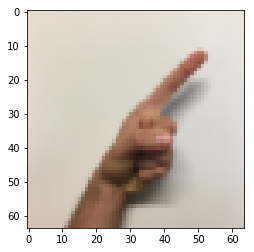

In [4]:
index = 9
plt.imshow(X_test_orig[index])
print ("y = " + str(np.squeeze(Y_test_orig[:, index])))

In [5]:
# Normalize image vectors
X_train = X_train_orig / 255.
X_test = X_test_orig / 255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (6, 1080)
X_test shape: (120, 64, 64, 3)
Y_test shape: (6, 120)


In [6]:
model = Sequential()#宣告一個model

In [7]:
#1st convolution layer: 有16個濾波器,每個大小為5X5
#model.add(Conv2D(filters = 16, kernel_size = (5, 5), input_shape = (64, 64, 3), activation = 'relu'))
#1st pool layer
#model.add(MaxPooling2D(pool_size = (2, 2)))
#2nd connolution layer: padding='same'表示捲積後圖片大小不變,換句話說會自動補值
#model.add(Conv2D(filters = 36, kernel_size = (5, 5), padding = 'same'))
#2nd pool layer
#model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Dropout(0.25))

input_shape = (64, 64, 3)

model.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#flatten layer: 由於之前擷取特徵都用2維, 所以要加一個"平坦層"轉換成1維再丟進fully connected neural network
model.add(Flatten())

In [8]:
#input layer
model.add(Dense(25, input_dim=64*64*3, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(Dropout(0.2))
#hidden layer
model.add(Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(Dropout(0.2))
#output layer
model.add(Dense(6, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))

In [9]:
#成本函數使用cross entropy
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#打印模型
model.summary()

#紀錄更新過程
#history = LossHistory()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 256)       295168    
__________

In [10]:
#mini_batch: 隨機挑32張圖片作為一個batch, 所有batch看1500次
#validation_split: 分配作為驗證資料的比例, 以這次作業來,就是有1080*0.8張作訓練,1080*0.2張來驗證
train_history = model.fit(
    x = X_train, 
    y = Y_train.T, 
    validation_data = (X_test, Y_test.T), 
    validation_split = 0.2, 
    epochs = 10, 
    batch_size = 50)

Train on 1080 samples, validate on 120 samples
Epoch 1/10
1080/1080 [==============================] - 26s 24ms/step - loss: 1.7996 - acc: 0.1713 - val_loss: 1.7986 - val_acc: 0.1667
Epoch 2/10
1080/1080 [==============================] - 5s 4ms/step - loss: 1.7985 - acc: 0.1519 - val_loss: 1.7983 - val_acc: 0.1667
Epoch 3/10
1080/1080 [==============================] - 5s 4ms/step - loss: 1.7981 - acc: 0.1667 - val_loss: 1.7979 - val_acc: 0.1667
Epoch 4/10
1080/1080 [==============================] - 5s 4ms/step - loss: 1.7977 - acc: 0.1667 - val_loss: 1.7976 - val_acc: 0.1667
Epoch 5/10
1080/1080 [==============================] - 5s 4ms/step - loss: 1.7974 - acc: 0.1565 - val_loss: 1.7972 - val_acc: 0.1667
Epoch 6/10
1080/1080 [==============================] - 5s 4ms/step - loss: 1.7971 - acc: 0.1769 - val_loss: 1.7964 - val_acc: 0.2417
Epoch 7/10
1080/1080 [==============================] - 5s 4ms/step - loss: 1.7986 - acc: 0.1639 - val_loss: 1.7967 - val_acc: 0.1667
Epoch 8/10
10

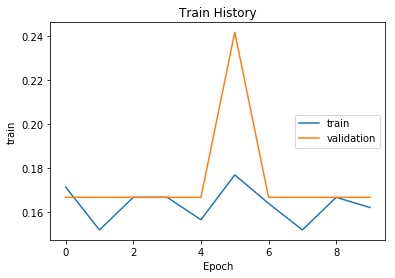

In [11]:
show_train_history(train_history, 'acc', 'val_acc')

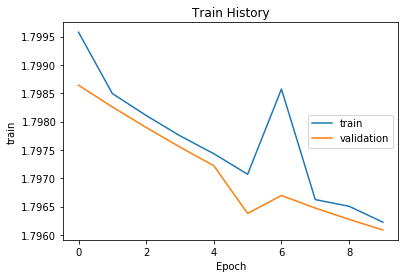

In [12]:
show_train_history(train_history, 'loss', 'val_loss')

In [13]:
score = model.evaluate(X_test, Y_test.T, batch_size=120, verbose=0)
print('Total loss on Testing Set:', score[0])
print('Accuracy of Testing Set:', score[1])

Total loss on Testing Set: 1.79608893394
Accuracy of Testing Set: 0.166666671634


In [14]:
result = model.predict(X_test)#取出你訓練的模型, 可以拿來實際應用

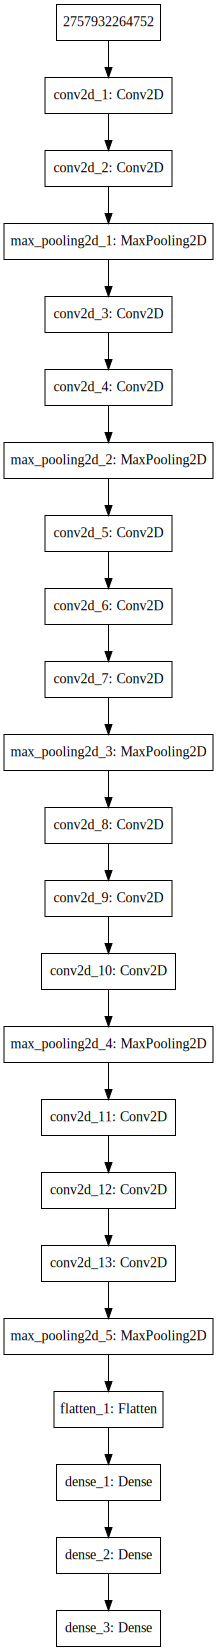

In [15]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#產生模型結構圖.png
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [16]:
import pandas as pd
prediction = model.predict_classes(X_test)
y_label = Y_test_orig.reshape(120,)
pd.crosstab(y_label, prediction, rownames=['label'], colnames=['predict'])

predict,3
label,
0,20
1,20
2,20
3,20
4,20
5,20


In [17]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_test_orig[12].reshape(1, 64, 64, 3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size): 
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index])
            activation_index += 1

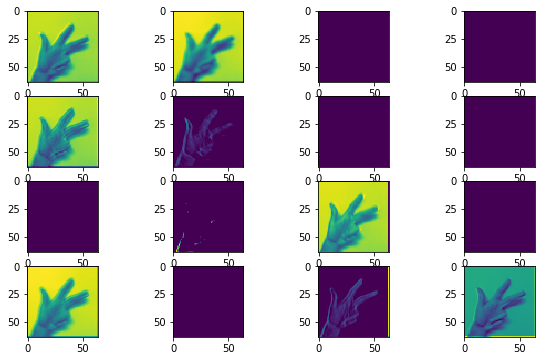

In [18]:
display_activation(activations, 4, 4, 0)

In [19]:
layer_outputs

[<tf.Tensor 'conv2d_1/Relu:0' shape=(?, 64, 64, 64) dtype=float32>,
 <tf.Tensor 'conv2d_2/Relu:0' shape=(?, 64, 64, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 32, 32, 64) dtype=float32>,
 <tf.Tensor 'conv2d_3/Relu:0' shape=(?, 32, 32, 128) dtype=float32>,
 <tf.Tensor 'conv2d_4/Relu:0' shape=(?, 32, 32, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 16, 16, 128) dtype=float32>,
 <tf.Tensor 'conv2d_5/Relu:0' shape=(?, 16, 16, 256) dtype=float32>,
 <tf.Tensor 'conv2d_6/Relu:0' shape=(?, 16, 16, 256) dtype=float32>,
 <tf.Tensor 'conv2d_7/Relu:0' shape=(?, 16, 16, 256) dtype=float32>,
 <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(?, 8, 8, 256) dtype=float32>,
 <tf.Tensor 'conv2d_8/Relu:0' shape=(?, 8, 8, 512) dtype=float32>,
 <tf.Tensor 'conv2d_9/Relu:0' shape=(?, 8, 8, 512) dtype=float32>,
 <tf.Tensor 'conv2d_10/Relu:0' shape=(?, 8, 8, 512) dtype=float32>,
 <tf.Tensor 'max_pooling2d_4/MaxPool:0' shape=(?, 4, 4, 512) dtype=float32>,
 <tf.T